In [2]:
from shapely import *
import shapely.plotting as splt
import shapely.ops as sopt
import shapely as shp

import matplotlib.pyplot as plt
import numpy as np

import sympy as smp

from enum import Enum

from icecream import ic




In [40]:
# create a room 
room_lx = 20 #m - length in x
room_ly= 10 #m 
room_poly = box(0.0, 0.0, room_lx, room_ly)

dx = dy = 1

In [48]:
class Position(Enum):
    LEFT = 1
    RIGHT = 2
    TOP = 3
    BOTTOM = 4

In [52]:
class BoundaryCondition(Enum):
    CONVECTION = 1
    ADIABATIC = 2
    FIXED_TEMP = 3
    # conduction, radiation 

In [49]:
for p in Position:
    print(p)

Position.LEFT
Position.RIGHT
Position.TOP
Position.BOTTOM


In [55]:
positions = ["LEFT", "RIGHT", "TOP", "BOTTOM"]
bc = [BoundaryCondition.CONVECTION] + [BoundaryCondition.ADIABATIC]*3
bc

[<BoundaryCondition.CONVECTION: 1>,
 <BoundaryCondition.ADIABATIC: 2>,
 <BoundaryCondition.ADIABATIC: 2>,
 <BoundaryCondition.ADIABATIC: 2>]

In [91]:
class LineData:
    dirxy = "x"
    rel_len = 1

    def hello(self):
        return "hi"

In [92]:
l = LineData().hello()
l

'hi'

In [83]:
l.dirxy = 3

In [87]:
l.rel_len

1

In [88]:
l.__dict__

{'dirxy': 3}

In [79]:
def create_convection_term():
    return 0 

def create_adiabatic_term():
    return 1 

def create_BC_term(key):
    term_creation = {
        "CONVECTION": create_convection_term,
        "ADIABATIC": create_adiabatic_term
    }

    res = term_creation[key]()

    return res




In [80]:
create_BC_term("ADIABATIC")

1

In [63]:
Position.LEFT.name

'LEFT'

In [64]:
[p.name for p in Position]

['LEFT', 'RIGHT', 'TOP', 'BOTTOM']

In [70]:
bc_data = {}

for pos in Position:
    p = pos.name
    bc_data[p] = {}
    bc_data[p]["poly"] = generate_BC_geom(p, room_poly=room_poly, dx=dx, dy=dy)

    if p == Position.LEFT.name:
        bc_data[p]["condition"] = BoundaryCondition.CONVECTION.name
    else:
        bc_data[p]["condition"] = BoundaryCondition.ADIABATIC.name




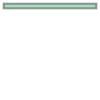

In [43]:
generate_BC_geom("TOP", room_poly=room_poly, dx=dx, dy=dy)

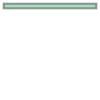

In [45]:
generate_BC_geom("BOTTOM", room_poly=room_poly, dx=dx, dy=dy)

In [39]:
# create somewhat arbitrary BCs around this room 
def generate_BC_geom(pos, room_poly=room_poly, dx=dx, dy=dy):
    rxy = room_poly.exterior.xy

    rxmax = max(rxy[0])
    rxmin = min(rxy[0])

    rymax = max(rxy[1])
    rymin = min(rxy[1])

    d= {
    "xmin": rxmin,
    "xmax": rxmax, 
    "ymin": rymin,
    "ymax": rymax
    }

    update_d = {
        "LEFT": {
            "xmin": rxmin - dx,
            "xmax": rxmin,
        },
        "RIGHT": {
            "xmin": rxmax,
            "xmax": rxmax + dx,
        },
        "TOP": {
            "ymin": rymax,
            "ymax": rymax + dy,
        },
        "BOTTOM": {
            "ymin": rymin - dy,
            "ymax": rymin,
        },
    }

    d.update(update_d[pos])

    geo = box(**d)

    return geo


In [19]:
# box? # (xmin, ymin, xmax, ymax,

In [ ]:
update_d = {
    "LEFT": {
        "xmin": rxmin - dx,
        "xmax": rxmin,
    },
    "RIGHT": {
        "xmin": rxmax,
        "xmax": rxmax + dx,
    },
    "TOP": {
        "ymin": rymax,
        "ymax": rymax + dy,
    },
    "BOTTOM": {
        "ymin": rymin - dy,
        "ymax": rymin,
    },
}

In [35]:
rxy = room_poly.exterior.xy
dx = dy = 1

rxmax = max(rxy[0])
rxmin = min(rxy[0])

rymax = max(rxy[1])
rymin = min(rxy[1])

d= {
    "xmin": rxmin,
    "xmax": rxmax, 
    "ymin": rymin,
    "ymax": rymax
}
d

{'xmin': 0.0, 'xmax': 20.0, 'ymin': 0.0, 'ymax': 10.0}

In [ ]:
if name == "left":
    d["xmin"] = rxmin - dx
    d["xmax"] = rxmax

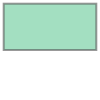

In [38]:
dd = box(**d)
dd

In [37]:
dd.exterior.xy

(array('d', [20.0, 20.0, 0.0, 0.0, 20.0]),
 array('d', [0.0, 10.0, 10.0, 0.0, 0.0]))

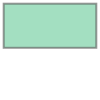

In [28]:



# # xmin, ymin, xmax, ymax,
# a = [rxmin, rymin, rxmax, rymax]

# b = a.copy()
# b[0] = b[0] - dx

# c = a.copy()
# c[0] = c[0] - dx


box(*b)

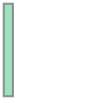

In [13]:
generate_BC_geom(room_poly, 1, 1)